In [1]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

# Definimos a cidade do buscador

In [2]:
# Sao Paulo
SP_url = '''https://www.airbnb.com.br/s/Sao-Paulo-~-S%C3%A3o-Paulo--Brazil/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&query=Sao%20Paulo%20-%20S%C3%A3o%20Paulo%2C%20Brazil&place_id=ChIJ0WGkg4FEzpQRrlsz_whLqZs&date_picker_type=calendar&source=structured_search_input_header&search_type=autocomplete_click'''

# Rio
RJ_url = '''https://www.airbnb.com.br/s/Rio-de-Janeiro-~-RJ/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&date_picker_type=calendar&source=structured_search_input_header&search_type=autocomplete_click&query=Rio%20de%20Janeiro%20-%20RJ&place_id=ChIJW6AIkVXemwARTtIvZ2xC3FA'''

In [3]:
# soup = BeautifulSoup(requests.get(airbnb_url).content, 'html.parser')

In [4]:
# print(soup.prettify())

# Lista com cada um dos links das paginas do buscador

In [5]:
def create_pages(city='SP'):
    '''
    
    '''
    pages = []
    if city == 'SP':
        pages.append(SP_url)
    else:
        pages.append(RJ_url)                

    for i in range(1000):
        soup = BeautifulSoup(requests.get(pages[-1]).content, 'html.parser')
        try:
            url = 'https://www.airbnb.com.br' + soup.find('a', '_1bfat5l').get('href')
        except:
            break
        pages.append(url)
        
    return pages

In [6]:
pages_sp = create_pages('SP')
pages_rj = create_pages('RJ')

# Construção de listas com os dados de interesse e do dataframe com os dados da varredura

In [7]:
# scraping dos títulos, camas, precos e avaliacoes de cada uma das acomodações
def create_df(pages):
    '''
    
    '''
    titles = []
    links = []
    camas = []
    precos = []
    avaliacoes = []

    for page in pages:
        soup = BeautifulSoup(requests.get(page).content, 'html.parser')

        for i in range(len(soup.find_all('a', 'ln2bl2p dir dir-ltr'))):
            links.append('https://www.airbnb.com.br' + soup.find_all('a', 'ln2bl2p dir dir-ltr')[i].get('href'))
            titles.append(soup.find_all('div', 't1jojoys dir dir-ltr')[i].get_text())
            camas.append(soup.find_all('div', 'f15liw5s s1cjsi4j dir dir-ltr')[i].get_text())
            precos.append(soup.find_all('div', 'p1v28t5c dir dir-ltr')[i].get_text())
            avaliacoes.append(soup.find_all('span', 'ru0q88m dir dir-ltr')[i].get_text())
    
    # construcao do dataframe com os dados da varredura
    df = pd.DataFrame({'titles': titles, 'link': links, 'camas': camas, 'precos': precos, 'avaliacoes': avaliacoes})
    df['precos'] = df['precos'].str.extract('(\d+)')
    
    return df

# Construção do dataframe com os dados da varredura

In [8]:
df_sp = create_df(pages_sp)
df_rj = create_df(pages_rj)

In [12]:
df_sp['cidade'] = "São Paulo"
df_rj['cidade'] = "Rio de Janeiro"

In [15]:
df = pd.concat([df_sp, df_rj])

In [72]:
df.head()

,titles,link,camas,precos,avaliacoes,cidade
0,Apartamento em República,https://www.airbnb.com.br/rooms/46816894?adult...,1 cama de viúva,87.0,"4,94",São Paulo
1,Quarto inteiro em São Paulo,https://www.airbnb.com.br/rooms/16715287?adult...,14 – 21 de dez.,62.0,"4,8",São Paulo
2,Apartamento em São Paulo,https://www.airbnb.com.br/rooms/2286825?adults...,1 cama de casal,168.0,"4,78",São Paulo
3,Condomínio em Moema,https://www.airbnb.com.br/rooms/23944985?adult...,27 de ago. – 3 de set.,126.0,"4,75",São Paulo
4,Apartamento em São Paulo,https://www.airbnb.com.br/rooms/12167996?adult...,1 cama de casal,135.0,"4,71",São Paulo


In [64]:
df.precos.dtype

dtype('float64')

In [57]:
df['precos'] = df.precos.astype('float')

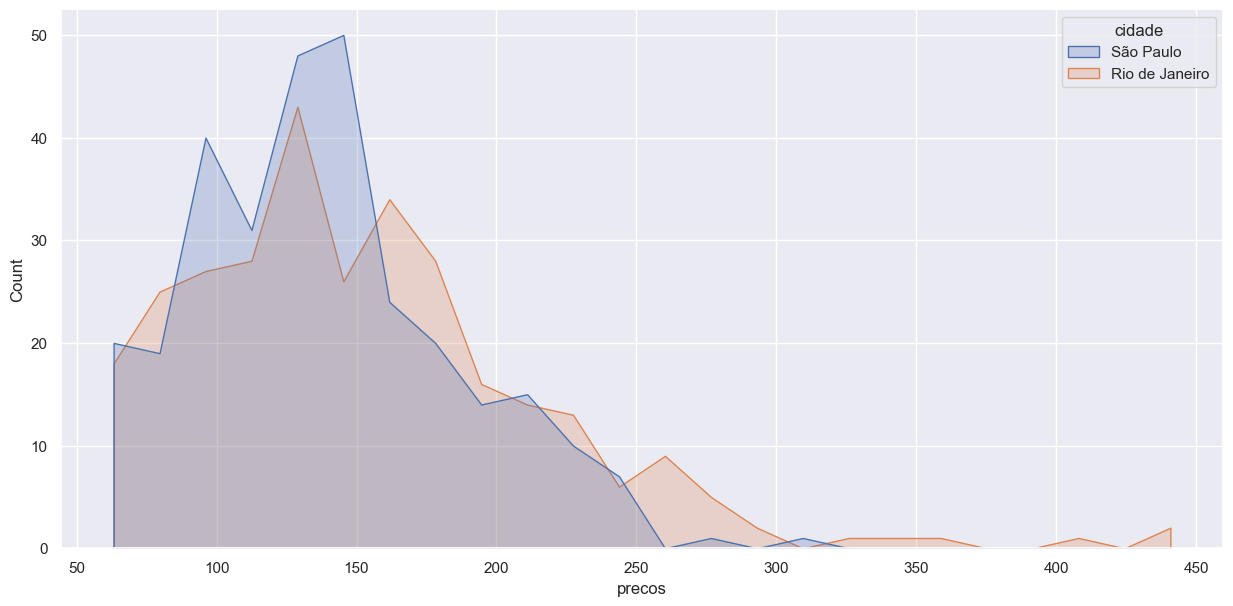

In [71]:
ax = sns.histplot(data=df, x="precos", hue="cidade", element="poly", discrete=False);
sns.set(rc={'figure.figsize':(15, 7)})
# sns.set_xticks(axs.get_xticks()[::6])
# plt.xaxis.set_major_locator(ticker.MultipleLocator(5))
# ax.set_xticks(range(3))
# ax.set_xticklabels(['100', '300', '500'])
# for index, label in enumerate(ax.get_xticklabels()):
#     if index % 2 == 0:
#         label.set_visible(True)
#     else:
#         label.set_visible(False)
plt.show()

Os dataframes foram construidos com dados de São Paulo e Rio De Janeiro, pode ser feita uma análise comparativa dos preços e outros atributos de cada uma das acomodações.